In [1]:

#Dependencies
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
from collections import Counter
import numpy as np
import os
import csv

#Read raw csv for all_goalkeepers_working_copy
file_one = "Resources/all_goalkeepers_working_copy.csv"
gk_cleaning = pd.read_csv(file_one)
gk_cleaning

,Player,Club,Position,Games Played,GS,Minutes,Shots,SV,Goals Against,Goals Against Average,PKG/A,Won,Loss,Tie,ShO,Winning %,Save %,Year,Season
0,Mark Dodd,DAL,GK,31,31,2776,235,160,45,1.45,5-May,17,14,0,6,54.8,68.1,1996,reg
1,Tony Meola,MET,GK,29,29,2610,188,142,38,1.31,4-Mar,14,15,0,9,48.3,75.5,1996,reg
2,Mark Dougherty,TB,GK,28,28,2520,186,123,47,1.68,10-Sep,17,11,0,3,60.7,66.1,1996,reg
3,Jorge Campos,LA,GK,24,24,2160,133,100,27,1.13,0/1,13,8,0,4,54.2,75.2,1996,reg
4,Garth Lagerwey,KC,GK,23,22,1959,133,83,38,1.73,2-Feb,12,10,0,3,52.2,62.4,1996,reg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,Adrian Zendejas,NaN,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2020,post
2002,Mason Stajduhar,NaN,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2020,post
2003,Brady Scott,NaN,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2020,post
2004,Kendall McIntosh,NaN,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2020,post


In [2]:
#Eliminate rows past 2019
indexNames = gk_cleaning[ gk_cleaning["Year"] > 2019 ].index
# Delete these row indexes from dataFrame
gk_cleaning.drop(indexNames , inplace=True)
gk_cleaning


,Player,Club,Position,Games Played,GS,Minutes,Shots,SV,Goals Against,Goals Against Average,PKG/A,Won,Loss,Tie,ShO,Winning %,Save %,Year,Season
0,Mark Dodd,DAL,GK,31,31,2776,235,160,45,1.45,5-May,17,14,0,6,54.8,68.1,1996,reg
1,Tony Meola,MET,GK,29,29,2610,188,142,38,1.31,4-Mar,14,15,0,9,48.3,75.5,1996,reg
2,Mark Dougherty,TB,GK,28,28,2520,186,123,47,1.68,10-Sep,17,11,0,3,60.7,66.1,1996,reg
3,Jorge Campos,LA,GK,24,24,2160,133,100,27,1.13,0/1,13,8,0,4,54.2,75.2,1996,reg
4,Garth Lagerwey,KC,GK,23,22,1959,133,83,38,1.73,2-Feb,12,10,0,3,52.2,62.4,1996,reg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847,Phillip Ejimadu,NaN,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2019,post
1848,Kendall McIntosh,NaN,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2019,post
1849,Pablo Sisniega,NaN,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2019,post
1850,Brendan Moore,NaN,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2019,post


In [3]:
#Eliminate post season rows
indexNames = gk_cleaning[ gk_cleaning["Season"] == "post" ].index
# Delete these row indexes from dataFrame
gk_cleaning.drop(indexNames , inplace=True)
gk_cleaning




,Player,Club,Position,Games Played,GS,Minutes,Shots,SV,Goals Against,Goals Against Average,PKG/A,Won,Loss,Tie,ShO,Winning %,Save %,Year,Season
0,Mark Dodd,DAL,GK,31,31,2776,235,160,45,1.45,5-May,17,14,0,6,54.8,68.1,1996,reg
1,Tony Meola,MET,GK,29,29,2610,188,142,38,1.31,4-Mar,14,15,0,9,48.3,75.5,1996,reg
2,Mark Dougherty,TB,GK,28,28,2520,186,123,47,1.68,10-Sep,17,11,0,3,60.7,66.1,1996,reg
3,Jorge Campos,LA,GK,24,24,2160,133,100,27,1.13,0/1,13,8,0,4,54.2,75.2,1996,reg
4,Garth Lagerwey,KC,GK,23,22,1959,133,83,38,1.73,2-Feb,12,10,0,3,52.2,62.4,1996,reg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,Brendan Moore,ATL,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2019,reg
1227,Jeff Caldwell,NE,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2019,reg
1228,Adam Grinwis,ORL,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2019,reg
1229,Thomas Hasal,VAN,GK,0,0,0,0,0,0,0.00,0/0,0,0,0,0,0.0,0.0,2019,reg


In [4]:
#Eliminate Goal keepers with less than 900 Minutes
indexNames = gk_cleaning[ gk_cleaning["Minutes"] < 900  ].index

# Delete these row indexes from dataFrame
gk_cleaning.drop(indexNames , inplace=True)
gk_cleaning


,Player,Club,Position,Games Played,GS,Minutes,Shots,SV,Goals Against,Goals Against Average,PKG/A,Won,Loss,Tie,ShO,Winning %,Save %,Year,Season
0,Mark Dodd,DAL,GK,31,31,2776,235,160,45,1.45,5-May,17,14,0,6,54.8,68.1,1996,reg
1,Tony Meola,MET,GK,29,29,2610,188,142,38,1.31,4-Mar,14,15,0,9,48.3,75.5,1996,reg
2,Mark Dougherty,TB,GK,28,28,2520,186,123,47,1.68,10-Sep,17,11,0,3,60.7,66.1,1996,reg
3,Jorge Campos,LA,GK,24,24,2160,133,100,27,1.13,0/1,13,8,0,4,54.2,75.2,1996,reg
4,Garth Lagerwey,KC,GK,23,22,1959,133,83,38,1.73,2-Feb,12,10,0,3,52.2,62.4,1996,reg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,David Ousted,CHI,GK,14,14,1260,56,34,20,1.43,2-Jan,4,6,4,4,28.6,60.7,2019,reg
1174,Zack Steffen,CLB,GK,13,13,1170,56,39,17,1.31,2-Jan,5,6,2,4,38.5,69.6,2019,reg
1175,Eloy Room,CLB,GK,12,12,1080,47,33,14,1.17,2-Feb,5,2,5,1,41.7,70.2,2019,reg
1176,Clint Irwin,COL,GK,11,9,901,58,42,17,1.89,3-Feb,4,4,2,1,36.4,72.4,2019,reg


In [5]:
#Sort by 
gk_cleaning_mins_vs_gaa = gk_cleaning.sort_values(by =['Minutes',  'Goals Against Average'], ascending=False)
gk_cleaning_mins_vs_gaa

,Player,Club,Position,Games Played,GS,Minutes,Shots,SV,Goals Against,Goals Against Average,PKG/A,Won,Loss,Tie,ShO,Winning %,Save %,Year,Season
1071,David Bingham,LA,GK,34,34,3060,186,121,64,1.88,8-Jun,13,12,9,8,38.2,65.1,2018,reg
930,Joe Bendik,PHI,GK,34,34,3060,178,114,60,1.76,7-Apr,9,11,14,5,26.5,64.0,2016,reg
1151,Daniel Vega,SJ,GK,34,34,3060,164,108,55,1.62,7-Apr,13,16,5,7,38.2,65.9,2019,reg
866,Steve Clark,POR,GK,34,34,3060,168,114,53,1.56,4-Apr,15,11,8,6,44.1,67.9,2015,reg
1072,Evan Bush,MTL,GK,34,34,3060,184,132,53,1.56,8-Jun,14,16,4,10,41.2,71.7,2018,reg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,Greg Sutton,NY,GK,10,10,900,44,30,15,1.50,5-Feb,3,2,5,2,30.0,68.2,2011,reg
758,Joe Cannon,VAN,GK,10,10,900,42,31,14,1.40,0/0,3,4,3,1,30.0,73.8,2013,reg
823,Jeff Attinella,POR,GK,10,10,900,60,45,14,1.40,5-Mar,2,4,4,3,20.0,75.0,2014,reg
398,Noah Palmer,CLB,GK,10,10,900,56,40,13,1.30,0/0,1,5,4,1,10.0,71.4,2006,reg


In [6]:
gk_cleaning_Min_win=gk_cleaning.drop(["Position", "Games Played", "GS", "ShO", "Won", "Loss", "Tie", "Goals Against", "Goals Against Average", "Shots", "SV", "Season", "PKG/A"], axis = 1)
gk_cleaning_Min_win.head(50)

gk_cleaning_Min_win.sort_values(by =['Minutes',  'Winning %'], ascending=False)

,Player,Club,Minutes,Winning %,Save %,Year
803,Stefan Frei,SEA,3060,58.8,66.4,2014
615,Kasey Keller,SEA,3060,52.9,75.9,2011
674,Jimmy Nielsen,KC,3060,52.9,75.5,2012
863,Luis Robles,MIA,3060,52.9,65.6,2015
1070,Tim Melia,SKC,3060,52.9,71.6,2018
...,...,...,...,...,...,...
1096,Brian Rowe,ORL,900,30.0,58.0,2018
823,Jeff Attinella,POR,900,20.0,75.0,2014
398,Noah Palmer,CLB,900,10.0,71.4,2006
441,Andy Gruenebaum,CLB,900,10.0,66.0,2007


In [7]:
gk_sorted = gk_cleaning_Min_win.sort_values(by=['Year'], ascending=False)
gk_sorted

,Player,Club,Minutes,Winning %,Save %,Year
1177,Jeff Attinella,POR,900,10.0,62.5,2019
1163,Tyler Miller,MIN,2520,64.3,69.9,2019
1149,Vito Mannone,MIN,3060,44.1,73.7,2019
1150,Brad Guzan,ATL,3060,52.9,67.4,2019
1151,Daniel Vega,SJ,3060,38.2,65.9,2019
...,...,...,...,...,...,...
34,Jim St. Andre,NE,1346,46.7,62.6,1996
35,Dave Salzwedel,SJ,1168,57.1,66.3,1996
36,Bo Oshoniyi,CLB,1170,23.1,63.4,1996
37,Pat Harrington,CLB,924,41.7,40.4,1996


In [8]:
gk_sorted_pct = gk_sorted.sort_values(by=['Winning %', 'Save %'], ascending= [False,False])
gk_sorted_pct

,Player,Club,Minutes,Winning %,Save %,Year
128,Marcus Hahnemann,COL,1170,76.9,80.0,1999
78,Scott Garlick,DC,2205,76.0,68.2,1998
73,Kevin Hartman,LA,2544,75.9,72.0,1998
48,Mike Ammann,KC,2597,72.4,68.1,1997
52,Walter Zenga,NE,1980,68.2,71.7,1997
...,...,...,...,...,...,...
953,Matt Lampson,CLB,990,9.1,72.4,2016
537,Preston Burpo,COL,990,9.1,56.1,2009
440,Kenny Stamatopoulos,TOR,1080,8.3,67.2,2007
750,Bill Hamid,DC,2250,8.0,67.2,2013


In [9]:
bins = [900, 1115, 1331, 1547, 1763,
        1979, 2195, 2411, 2627, 2843, 3060]

group_labels = ["900 to 1115", "1115 to 1331", "1331 to 1547", "1547 to 1763", "1763 to 1979", "1979 to 2195",
                "2195 to 2411", "2411 to 2627", "2627 to 2843", "2843 to 3060"]

In [10]:
pd.cut(gk_cleaning["Minutes"], bins, labels=group_labels).head(16)

0     2627 to 2843
1     2411 to 2627
2     2411 to 2627
3     1979 to 2195
4     1763 to 1979
5     1979 to 2195
6     1547 to 1763
7     1331 to 1547
8     1547 to 1763
10    1115 to 1331
11    1331 to 1547
12    1115 to 1331
13    1115 to 1331
14     900 to 1115
23    2627 to 2843
24    2411 to 2627
Name: Minutes, dtype: category
Categories (10, object): [900 to 1115 < 1115 to 1331 < 1331 to 1547 < 1547 to 1763 ... 2195 to 2411 < 2411 to 2627 < 2627 to 2843 < 2843 to 3060]

In [11]:
gk_cleaning["Minutes Group"] = pd.cut(gk_cleaning["Minutes"], bins, labels=group_labels)
gk_cleaning.head(50)

,Player,Club,Position,Games Played,GS,Minutes,Shots,SV,Goals Against,Goals Against Average,PKG/A,Won,Loss,Tie,ShO,Winning %,Save %,Year,Season,Minutes Group
0,Mark Dodd,DAL,GK,31,31,2776,235,160,45,1.45,5-May,17,14,0,6,54.8,68.1,1996,reg,2627 to 2843
1,Tony Meola,MET,GK,29,29,2610,188,142,38,1.31,4-Mar,14,15,0,9,48.3,75.5,1996,reg,2411 to 2627
2,Mark Dougherty,TB,GK,28,28,2520,186,123,47,1.68,10-Sep,17,11,0,3,60.7,66.1,1996,reg,2411 to 2627
3,Jorge Campos,LA,GK,24,24,2160,133,100,27,1.13,0/1,13,8,0,4,54.2,75.2,1996,reg,1979 to 2195
4,Garth Lagerwey,KC,GK,23,22,1959,133,83,38,1.73,2-Feb,12,10,0,3,52.2,62.4,1996,reg,1763 to 1979
5,Chris Woods,COL,GK,23,23,2070,149,96,43,1.87,2-Feb,8,15,0,2,34.8,64.4,1996,reg,1979 to 2195
6,Tom Liner,SJ,GK,20,20,1712,118,75,33,1.65,2-Jan,7,12,0,4,35.0,63.6,1996,reg,1547 to 1763
7,Aidan Heaney,NE,GK,19,18,1534,130,93,29,1.61,2-Feb,8,9,0,4,42.1,71.5,1996,reg,1331 to 1547
8,Jeff Causey,DC,GK,19,18,1620,115,70,35,1.94,8-Jul,9,10,0,0,47.4,60.9,1996,reg,1547 to 1763
10,Mark Simpson,DC,GK,15,14,1260,69,46,21,1.50,0/0,7,6,0,3,46.7,66.7,1996,reg,1115 to 1331


In [20]:
gk_minutes = gk_cleaning.groupby('Minutes Group').sum()
gk_minutes.reset_index(inplace=True)
gk_minutes

,Minutes Group,index,Games Played,GS,Minutes,Shots,SV,Goals Against,Goals Against Average,Won,Loss,Tie,ShO,Winning %,Save %,Year,Win+Tie,Win Dec,Win Percentage
0,900 to 1115,0,436,419,38002,2275,1518,669,60.94,148,180,46.5,94,1293.8,2528.1,76307,194.5,0.446101,44.610092
1,1115 to 1331,1,548,532,48367,2837,1933,801,60.37,221,217,47.5,136,1609.1,2724.4,80299,268.5,0.489964,48.996350
2,1331 to 1547,2,456,448,40555,2406,1647,659,41.45,170,180,49.0,101,1041.5,1902.9,56182,219.0,0.480263,48.026316
3,1547 to 1763,3,455,450,40119,2340,1577,661,35.26,187,180,38.0,107,989.3,1627.9,48126,225.0,0.494505,49.450549
4,1763 to 1979,4,609,603,54128,3075,2080,888,42.68,235,240,62.0,128,1114.0,1957.1,58269,297.0,0.487685,48.768473
5,1979 to 2195,5,970,961,86325,5222,3566,1468,62.75,371,429,71.0,199,1562.1,2792.6,82274,442.0,0.455670,45.567010
6,2195 to 2411,6,1057,1050,94718,5571,3851,1566,61.37,396,418,113.5,240,1539.9,2823.9,82337,509.5,0.482025,48.202460
7,2411 to 2627,7,2097,2093,188565,10503,7399,2809,100.74,878,758,227.0,535,3132.8,5265.4,150630,1105.0,0.526943,52.694325
8,2627 to 2843,8,1528,1526,137119,7766,5519,1966,64.38,633,538,172.5,389,2070.7,3549.1,100400,805.5,0.527160,52.715969
9,2843 to 3060,9,2646,2645,237738,12117,8321,3590,108.64,1046,918,338.0,704,3159.1,5489.1,161144,1384.0,0.523054,52.305367


In [21]:
gk_minutes["Tie"] = 0.5 * gk_minutes["Tie"]
gk_minutes

,Minutes Group,index,Games Played,GS,Minutes,Shots,SV,Goals Against,Goals Against Average,Won,Loss,Tie,ShO,Winning %,Save %,Year,Win+Tie,Win Dec,Win Percentage
0,900 to 1115,0,436,419,38002,2275,1518,669,60.94,148,180,23.25,94,1293.8,2528.1,76307,194.5,0.446101,44.610092
1,1115 to 1331,1,548,532,48367,2837,1933,801,60.37,221,217,23.75,136,1609.1,2724.4,80299,268.5,0.489964,48.996350
2,1331 to 1547,2,456,448,40555,2406,1647,659,41.45,170,180,24.50,101,1041.5,1902.9,56182,219.0,0.480263,48.026316
3,1547 to 1763,3,455,450,40119,2340,1577,661,35.26,187,180,19.00,107,989.3,1627.9,48126,225.0,0.494505,49.450549
4,1763 to 1979,4,609,603,54128,3075,2080,888,42.68,235,240,31.00,128,1114.0,1957.1,58269,297.0,0.487685,48.768473
5,1979 to 2195,5,970,961,86325,5222,3566,1468,62.75,371,429,35.50,199,1562.1,2792.6,82274,442.0,0.455670,45.567010
6,2195 to 2411,6,1057,1050,94718,5571,3851,1566,61.37,396,418,56.75,240,1539.9,2823.9,82337,509.5,0.482025,48.202460
7,2411 to 2627,7,2097,2093,188565,10503,7399,2809,100.74,878,758,113.50,535,3132.8,5265.4,150630,1105.0,0.526943,52.694325
8,2627 to 2843,8,1528,1526,137119,7766,5519,1966,64.38,633,538,86.25,389,2070.7,3549.1,100400,805.5,0.527160,52.715969
9,2843 to 3060,9,2646,2645,237738,12117,8321,3590,108.64,1046,918,169.00,704,3159.1,5489.1,161144,1384.0,0.523054,52.305367


In [22]:
sum_column = gk_minutes["Won"] + gk_minutes["Tie"]
gk_minutes["Win+Tie"] = sum_column
gk_minutes

,Minutes Group,index,Games Played,GS,Minutes,Shots,SV,Goals Against,Goals Against Average,Won,Loss,Tie,ShO,Winning %,Save %,Year,Win+Tie,Win Dec,Win Percentage
0,900 to 1115,0,436,419,38002,2275,1518,669,60.94,148,180,23.25,94,1293.8,2528.1,76307,171.25,0.446101,44.610092
1,1115 to 1331,1,548,532,48367,2837,1933,801,60.37,221,217,23.75,136,1609.1,2724.4,80299,244.75,0.489964,48.996350
2,1331 to 1547,2,456,448,40555,2406,1647,659,41.45,170,180,24.50,101,1041.5,1902.9,56182,194.50,0.480263,48.026316
3,1547 to 1763,3,455,450,40119,2340,1577,661,35.26,187,180,19.00,107,989.3,1627.9,48126,206.00,0.494505,49.450549
4,1763 to 1979,4,609,603,54128,3075,2080,888,42.68,235,240,31.00,128,1114.0,1957.1,58269,266.00,0.487685,48.768473
5,1979 to 2195,5,970,961,86325,5222,3566,1468,62.75,371,429,35.50,199,1562.1,2792.6,82274,406.50,0.455670,45.567010
6,2195 to 2411,6,1057,1050,94718,5571,3851,1566,61.37,396,418,56.75,240,1539.9,2823.9,82337,452.75,0.482025,48.202460
7,2411 to 2627,7,2097,2093,188565,10503,7399,2809,100.74,878,758,113.50,535,3132.8,5265.4,150630,991.50,0.526943,52.694325
8,2627 to 2843,8,1528,1526,137119,7766,5519,1966,64.38,633,538,86.25,389,2070.7,3549.1,100400,719.25,0.527160,52.715969
9,2843 to 3060,9,2646,2645,237738,12117,8321,3590,108.64,1046,918,169.00,704,3159.1,5489.1,161144,1215.00,0.523054,52.305367


In [15]:
div_column = gk_minutes["Win+Tie"] / gk_minutes["Games Played"]
gk_minutes["Win Dec"] = div_column
gk_minutes

,Minutes Group,Games Played,GS,Minutes,Shots,SV,Goals Against,Goals Against Average,Won,Loss,Tie,ShO,Winning %,Save %,Year,Win+Tie,Win Dec
0,900 to 1115,436,419,38002,2275,1518,669,60.94,148,180,46.5,94,1293.8,2528.1,76307,194.5,0.446101
1,1115 to 1331,548,532,48367,2837,1933,801,60.37,221,217,47.5,136,1609.1,2724.4,80299,268.5,0.489964
2,1331 to 1547,456,448,40555,2406,1647,659,41.45,170,180,49.0,101,1041.5,1902.9,56182,219.0,0.480263
3,1547 to 1763,455,450,40119,2340,1577,661,35.26,187,180,38.0,107,989.3,1627.9,48126,225.0,0.494505
4,1763 to 1979,609,603,54128,3075,2080,888,42.68,235,240,62.0,128,1114.0,1957.1,58269,297.0,0.487685
5,1979 to 2195,970,961,86325,5222,3566,1468,62.75,371,429,71.0,199,1562.1,2792.6,82274,442.0,0.455670
6,2195 to 2411,1057,1050,94718,5571,3851,1566,61.37,396,418,113.5,240,1539.9,2823.9,82337,509.5,0.482025
7,2411 to 2627,2097,2093,188565,10503,7399,2809,100.74,878,758,227.0,535,3132.8,5265.4,150630,1105.0,0.526943
8,2627 to 2843,1528,1526,137119,7766,5519,1966,64.38,633,538,172.5,389,2070.7,3549.1,100400,805.5,0.527160
9,2843 to 3060,2646,2645,237738,12117,8321,3590,108.64,1046,918,338.0,704,3159.1,5489.1,161144,1384.0,0.523054


In [48]:
mul_column = gk_minutes["Win Dec"] * 100
gk_minutes["Win Percentage"] = mul_column
gk_minutes

,Minutes Group,index,Games Played,GS,Minutes,Shots,SV,Goals Against,Goals Against Average,Won,Loss,Tie,ShO,Winning %,Save %,Year,Win+Tie,Win Dec,Win Percentage
0,900 to 1115,0,436,419,38002,2275,1518,669,60.94,148,180,23.25,94,1293.8,2528.1,76307,171.25,0.446101,44.610092
1,1115 to 1331,1,548,532,48367,2837,1933,801,60.37,221,217,23.75,136,1609.1,2724.4,80299,244.75,0.489964,48.996350
2,1331 to 1547,2,456,448,40555,2406,1647,659,41.45,170,180,24.50,101,1041.5,1902.9,56182,194.50,0.480263,48.026316
3,1547 to 1763,3,455,450,40119,2340,1577,661,35.26,187,180,19.00,107,989.3,1627.9,48126,206.00,0.494505,49.450549
4,1763 to 1979,4,609,603,54128,3075,2080,888,42.68,235,240,31.00,128,1114.0,1957.1,58269,266.00,0.487685,48.768473
5,1979 to 2195,5,970,961,86325,5222,3566,1468,62.75,371,429,35.50,199,1562.1,2792.6,82274,406.50,0.455670,45.567010
6,2195 to 2411,6,1057,1050,94718,5571,3851,1566,61.37,396,418,56.75,240,1539.9,2823.9,82337,452.75,0.482025,48.202460
7,2411 to 2627,7,2097,2093,188565,10503,7399,2809,100.74,878,758,113.50,535,3132.8,5265.4,150630,991.50,0.526943,52.694325
8,2627 to 2843,8,1528,1526,137119,7766,5519,1966,64.38,633,538,86.25,389,2070.7,3549.1,100400,719.25,0.527160,52.715969
9,2843 to 3060,9,2646,2645,237738,12117,8321,3590,108.64,1046,918,169.00,704,3159.1,5489.1,161144,1215.00,0.523054,52.305367


In [49]:
plots_needed = gk_minutes[['Minutes Group', 'Win Percentage']]
plots_needed.reset_index(drop=True, inplace=False)

plots_needed

,Minutes Group,Win Percentage
0,900 to 1115,44.610092
1,1115 to 1331,48.996350
2,1331 to 1547,48.026316
3,1547 to 1763,49.450549
4,1763 to 1979,48.768473
5,1979 to 2195,45.567010
6,2195 to 2411,48.202460
7,2411 to 2627,52.694325
8,2627 to 2843,52.715969
9,2843 to 3060,52.305367


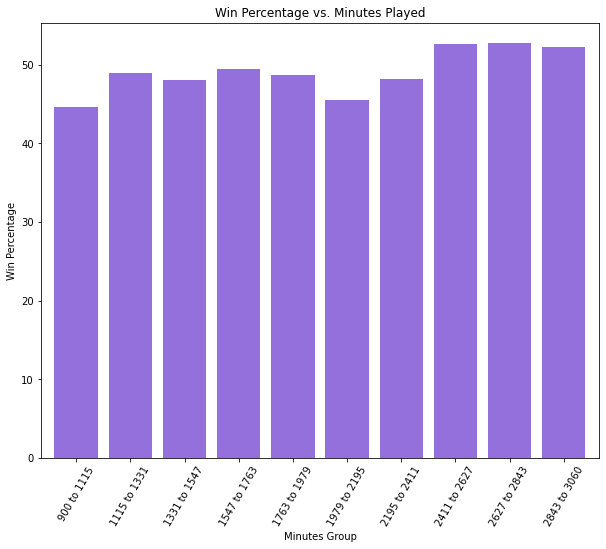

In [25]:
bar_plot = plots_needed.plot(x='Minutes Group', kind='bar', width=0.8, figsize=(10,8), color=['mediumpurple'],  legend=None,title="Win Percentage vs. Minutes Played")

#creating x and y axis
bar_plot.set_xlabel("Minutes Group")
bar_plot.set_ylabel("Win Percentage")

#rotate the agency names
plt.xticks(rotation=60)
plt.show()

In [26]:
#BAR GRAPH ON MINUTES VS LOSS PERCENTAGE
gk_mins_loss = gk_cleaning.groupby('Minutes Group').sum()
gk_mins_loss.reset_index(inplace=True)
gk_mins_loss

,Minutes Group,index,Games Played,GS,Minutes,Shots,SV,Goals Against,Goals Against Average,Won,Loss,Tie,ShO,Winning %,Save %,Year,Win+Tie,Win Dec,Win Percentage
0,900 to 1115,0,436,419,38002,2275,1518,669,60.94,148,180,46.5,94,1293.8,2528.1,76307,194.5,0.446101,44.610092
1,1115 to 1331,1,548,532,48367,2837,1933,801,60.37,221,217,47.5,136,1609.1,2724.4,80299,268.5,0.489964,48.996350
2,1331 to 1547,2,456,448,40555,2406,1647,659,41.45,170,180,49.0,101,1041.5,1902.9,56182,219.0,0.480263,48.026316
3,1547 to 1763,3,455,450,40119,2340,1577,661,35.26,187,180,38.0,107,989.3,1627.9,48126,225.0,0.494505,49.450549
4,1763 to 1979,4,609,603,54128,3075,2080,888,42.68,235,240,62.0,128,1114.0,1957.1,58269,297.0,0.487685,48.768473
5,1979 to 2195,5,970,961,86325,5222,3566,1468,62.75,371,429,71.0,199,1562.1,2792.6,82274,442.0,0.455670,45.567010
6,2195 to 2411,6,1057,1050,94718,5571,3851,1566,61.37,396,418,113.5,240,1539.9,2823.9,82337,509.5,0.482025,48.202460
7,2411 to 2627,7,2097,2093,188565,10503,7399,2809,100.74,878,758,227.0,535,3132.8,5265.4,150630,1105.0,0.526943,52.694325
8,2627 to 2843,8,1528,1526,137119,7766,5519,1966,64.38,633,538,172.5,389,2070.7,3549.1,100400,805.5,0.527160,52.715969
9,2843 to 3060,9,2646,2645,237738,12117,8321,3590,108.64,1046,918,338.0,704,3159.1,5489.1,161144,1384.0,0.523054,52.305367


In [27]:
#dividing games tied by half
gk_mins_loss["Tie"] = 0.5 * gk_mins_loss["Tie"]
gk_mins_loss

,Minutes Group,index,Games Played,GS,Minutes,Shots,SV,Goals Against,Goals Against Average,Won,Loss,Tie,ShO,Winning %,Save %,Year,Win+Tie,Win Dec,Win Percentage
0,900 to 1115,0,436,419,38002,2275,1518,669,60.94,148,180,23.25,94,1293.8,2528.1,76307,194.5,0.446101,44.610092
1,1115 to 1331,1,548,532,48367,2837,1933,801,60.37,221,217,23.75,136,1609.1,2724.4,80299,268.5,0.489964,48.996350
2,1331 to 1547,2,456,448,40555,2406,1647,659,41.45,170,180,24.50,101,1041.5,1902.9,56182,219.0,0.480263,48.026316
3,1547 to 1763,3,455,450,40119,2340,1577,661,35.26,187,180,19.00,107,989.3,1627.9,48126,225.0,0.494505,49.450549
4,1763 to 1979,4,609,603,54128,3075,2080,888,42.68,235,240,31.00,128,1114.0,1957.1,58269,297.0,0.487685,48.768473
5,1979 to 2195,5,970,961,86325,5222,3566,1468,62.75,371,429,35.50,199,1562.1,2792.6,82274,442.0,0.455670,45.567010
6,2195 to 2411,6,1057,1050,94718,5571,3851,1566,61.37,396,418,56.75,240,1539.9,2823.9,82337,509.5,0.482025,48.202460
7,2411 to 2627,7,2097,2093,188565,10503,7399,2809,100.74,878,758,113.50,535,3132.8,5265.4,150630,1105.0,0.526943,52.694325
8,2627 to 2843,8,1528,1526,137119,7766,5519,1966,64.38,633,538,86.25,389,2070.7,3549.1,100400,805.5,0.527160,52.715969
9,2843 to 3060,9,2646,2645,237738,12117,8321,3590,108.64,1046,918,169.00,704,3159.1,5489.1,161144,1384.0,0.523054,52.305367


In [29]:
#adding games tied to loss
sum_column = gk_mins_loss["Loss"] + gk_mins_loss["Tie"]
gk_mins_loss["Loss+Tie"] = sum_column
gk_mins_loss

,Minutes Group,index,Games Played,GS,Minutes,Shots,SV,Goals Against,Goals Against Average,Won,Loss,Tie,ShO,Winning %,Save %,Year,Win+Tie,Win Dec,Win Percentage,Loss+Tie
0,900 to 1115,0,436,419,38002,2275,1518,669,60.94,148,180,23.25,94,1293.8,2528.1,76307,171.25,0.446101,44.610092,203.25
1,1115 to 1331,1,548,532,48367,2837,1933,801,60.37,221,217,23.75,136,1609.1,2724.4,80299,244.75,0.489964,48.996350,240.75
2,1331 to 1547,2,456,448,40555,2406,1647,659,41.45,170,180,24.50,101,1041.5,1902.9,56182,194.50,0.480263,48.026316,204.50
3,1547 to 1763,3,455,450,40119,2340,1577,661,35.26,187,180,19.00,107,989.3,1627.9,48126,206.00,0.494505,49.450549,199.00
4,1763 to 1979,4,609,603,54128,3075,2080,888,42.68,235,240,31.00,128,1114.0,1957.1,58269,266.00,0.487685,48.768473,271.00
5,1979 to 2195,5,970,961,86325,5222,3566,1468,62.75,371,429,35.50,199,1562.1,2792.6,82274,406.50,0.455670,45.567010,464.50
6,2195 to 2411,6,1057,1050,94718,5571,3851,1566,61.37,396,418,56.75,240,1539.9,2823.9,82337,452.75,0.482025,48.202460,474.75
7,2411 to 2627,7,2097,2093,188565,10503,7399,2809,100.74,878,758,113.50,535,3132.8,5265.4,150630,991.50,0.526943,52.694325,871.50
8,2627 to 2843,8,1528,1526,137119,7766,5519,1966,64.38,633,538,86.25,389,2070.7,3549.1,100400,719.25,0.527160,52.715969,624.25
9,2843 to 3060,9,2646,2645,237738,12117,8321,3590,108.64,1046,918,169.00,704,3159.1,5489.1,161144,1215.00,0.523054,52.305367,1087.00


In [52]:
div_column = gk_mins_loss["Loss+Tie"] / gk_mins_loss["Games Played"]
gk_mins_loss["Loss Dec"] = div_column
gk_mins_loss

,Minutes Group,index,Games Played,GS,Minutes,Shots,SV,Goals Against,Goals Against Average,Won,...,ShO,Winning %,Save %,Year,Win+Tie,Win Dec,Win Percentage,Loss+Tie,Loss Dec,Loss Percentage
0,900 to 1115,0,436,419,38002,2275,1518,669,60.94,148,...,94,1293.8,2528.1,76307,171.25,0.446101,44.610092,0.466170,0.001069,0.106920
1,1115 to 1331,1,548,532,48367,2837,1933,801,60.37,221,...,136,1609.1,2724.4,80299,244.75,0.489964,48.996350,0.439325,0.000802,0.080169
2,1331 to 1547,2,456,448,40555,2406,1647,659,41.45,170,...,101,1041.5,1902.9,56182,194.50,0.480263,48.026316,0.448465,0.000983,0.098348
3,1547 to 1763,3,455,450,40119,2340,1577,661,35.26,187,...,107,989.3,1627.9,48126,206.00,0.494505,49.450549,0.437363,0.000961,0.096124
4,1763 to 1979,4,609,603,54128,3075,2080,888,42.68,235,...,128,1114.0,1957.1,58269,266.00,0.487685,48.768473,0.444992,0.000731,0.073069
5,1979 to 2195,5,970,961,86325,5222,3566,1468,62.75,371,...,199,1562.1,2792.6,82274,406.50,0.455670,45.567010,0.478866,0.000494,0.049368
6,2195 to 2411,6,1057,1050,94718,5571,3851,1566,61.37,396,...,240,1539.9,2823.9,82337,452.75,0.482025,48.202460,0.449149,0.000425,0.042493
7,2411 to 2627,7,2097,2093,188565,10503,7399,2809,100.74,878,...,535,3132.8,5265.4,150630,991.50,0.526943,52.694325,0.415594,0.000198,0.019818
8,2627 to 2843,8,1528,1526,137119,7766,5519,1966,64.38,633,...,389,2070.7,3549.1,100400,719.25,0.527160,52.715969,0.408541,0.000267,0.026737
9,2843 to 3060,9,2646,2645,237738,12117,8321,3590,108.64,1046,...,704,3159.1,5489.1,161144,1215.00,0.523054,52.305367,0.410809,0.000155,0.015526


In [65]:
gk_drop_extra = gk_mins_loss.drop('Loss Dec', axis=1) 
gk_drop_another = gk_drop_extra.drop('Loss Percentage', axis=1)
gk_drop_another

,Minutes Group,index,Games Played,GS,Minutes,Shots,SV,Goals Against,Goals Against Average,Won,Loss,Tie,ShO,Winning %,Save %,Year,Win+Tie,Win Dec,Win Percentage,Loss+Tie
0,900 to 1115,0,436,419,38002,2275,1518,669,60.94,148,180,23.25,94,1293.8,2528.1,76307,171.25,0.446101,44.610092,0.466170
1,1115 to 1331,1,548,532,48367,2837,1933,801,60.37,221,217,23.75,136,1609.1,2724.4,80299,244.75,0.489964,48.996350,0.439325
2,1331 to 1547,2,456,448,40555,2406,1647,659,41.45,170,180,24.50,101,1041.5,1902.9,56182,194.50,0.480263,48.026316,0.448465
3,1547 to 1763,3,455,450,40119,2340,1577,661,35.26,187,180,19.00,107,989.3,1627.9,48126,206.00,0.494505,49.450549,0.437363
4,1763 to 1979,4,609,603,54128,3075,2080,888,42.68,235,240,31.00,128,1114.0,1957.1,58269,266.00,0.487685,48.768473,0.444992
5,1979 to 2195,5,970,961,86325,5222,3566,1468,62.75,371,429,35.50,199,1562.1,2792.6,82274,406.50,0.455670,45.567010,0.478866
6,2195 to 2411,6,1057,1050,94718,5571,3851,1566,61.37,396,418,56.75,240,1539.9,2823.9,82337,452.75,0.482025,48.202460,0.449149
7,2411 to 2627,7,2097,2093,188565,10503,7399,2809,100.74,878,758,113.50,535,3132.8,5265.4,150630,991.50,0.526943,52.694325,0.415594
8,2627 to 2843,8,1528,1526,137119,7766,5519,1966,64.38,633,538,86.25,389,2070.7,3549.1,100400,719.25,0.527160,52.715969,0.408541
9,2843 to 3060,9,2646,2645,237738,12117,8321,3590,108.64,1046,918,169.00,704,3159.1,5489.1,161144,1215.00,0.523054,52.305367,0.410809


In [66]:
gk_drop_another['Loss+Tie'] = gk_drop_another['Loss+Tie']* 100
gk_drop_another

,Minutes Group,index,Games Played,GS,Minutes,Shots,SV,Goals Against,Goals Against Average,Won,Loss,Tie,ShO,Winning %,Save %,Year,Win+Tie,Win Dec,Win Percentage,Loss+Tie
0,900 to 1115,0,436,419,38002,2275,1518,669,60.94,148,180,23.25,94,1293.8,2528.1,76307,171.25,0.446101,44.610092,46.616972
1,1115 to 1331,1,548,532,48367,2837,1933,801,60.37,221,217,23.75,136,1609.1,2724.4,80299,244.75,0.489964,48.996350,43.932482
2,1331 to 1547,2,456,448,40555,2406,1647,659,41.45,170,180,24.50,101,1041.5,1902.9,56182,194.50,0.480263,48.026316,44.846491
3,1547 to 1763,3,455,450,40119,2340,1577,661,35.26,187,180,19.00,107,989.3,1627.9,48126,206.00,0.494505,49.450549,43.736264
4,1763 to 1979,4,609,603,54128,3075,2080,888,42.68,235,240,31.00,128,1114.0,1957.1,58269,266.00,0.487685,48.768473,44.499179
5,1979 to 2195,5,970,961,86325,5222,3566,1468,62.75,371,429,35.50,199,1562.1,2792.6,82274,406.50,0.455670,45.567010,47.886598
6,2195 to 2411,6,1057,1050,94718,5571,3851,1566,61.37,396,418,56.75,240,1539.9,2823.9,82337,452.75,0.482025,48.202460,44.914853
7,2411 to 2627,7,2097,2093,188565,10503,7399,2809,100.74,878,758,113.50,535,3132.8,5265.4,150630,991.50,0.526943,52.694325,41.559371
8,2627 to 2843,8,1528,1526,137119,7766,5519,1966,64.38,633,538,86.25,389,2070.7,3549.1,100400,719.25,0.527160,52.715969,40.854058
9,2843 to 3060,9,2646,2645,237738,12117,8321,3590,108.64,1046,918,169.00,704,3159.1,5489.1,161144,1215.00,0.523054,52.305367,41.080877


In [69]:
loss_plot = gk_drop_another[['Minutes Group', 'Loss+Tie']]
loss_plot.reset_index(drop=True, inplace=False)

loss_plot

,Minutes Group,Loss+Tie
0,900 to 1115,46.616972
1,1115 to 1331,43.932482
2,1331 to 1547,44.846491
3,1547 to 1763,43.736264
4,1763 to 1979,44.499179
5,1979 to 2195,47.886598
6,2195 to 2411,44.914853
7,2411 to 2627,41.559371
8,2627 to 2843,40.854058
9,2843 to 3060,41.080877


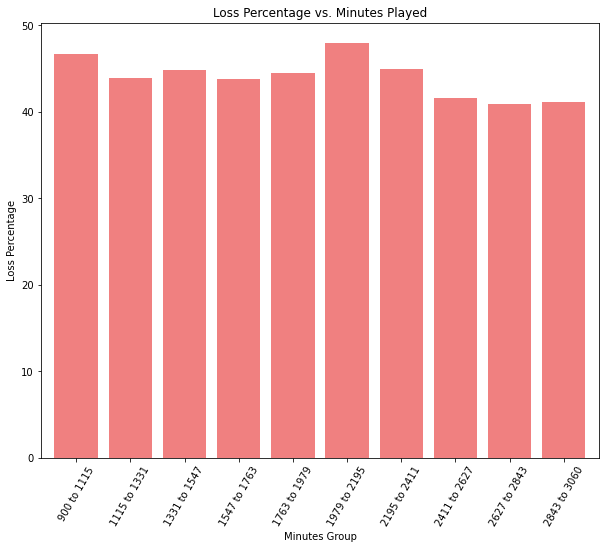

In [71]:
bar_plot = loss_plot.plot(x='Minutes Group', kind='bar', width=0.8, figsize=(10,8), color=['lightcoral'],  legend=None,title="Loss Percentage vs. Minutes Played")

#creating x and y axis
bar_plot.set_xlabel("Minutes Group")
bar_plot.set_ylabel("Loss Percentage")

#rotate the agency names
plt.xticks(rotation=60)
plt.show()